# Avacado Project

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 


Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single 
CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price.
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass 
avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet 
reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and 
military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even 
when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados
(e.g. greenskins) are not included in this table.



Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label :

The dataset can be seen in two angles to find the region and find the average price .

# Task: One of Classification and other of Regression

Classification 

In [225]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [226]:
df=pd.read_csv('avocado.csv')

In [227]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [228]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Exploratory Data Analysis

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [230]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [231]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [232]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [233]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [234]:
df1.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


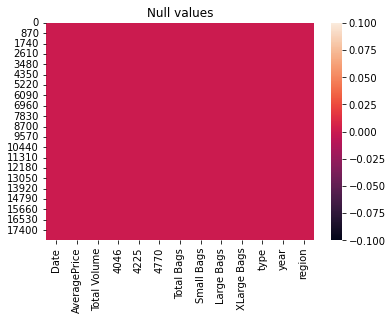

In [235]:
sns.heatmap(df1.isnull())
plt.title('Null values')
plt.show()

Checking the null values in the dataset

In [236]:
df1.isnull().sum().sum()

0

# Visualization

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

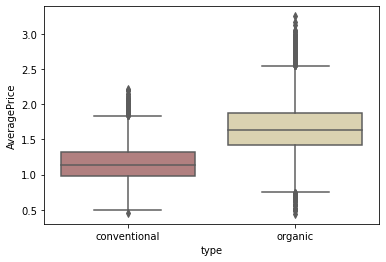

In [237]:
sns.boxplot(y='AveragePrice',x='type',data=df1,palette='pink')

From the above plot we can conclude that organic fruit price is more when compared to conventional 
fruit price 

# Label Encounter

In [238]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['region']=le.fit_transform(df['region'])

In [239]:
df1['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [240]:
df1['type']=le.fit_transform(df['type'])

In [241]:
df1['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

Therefore 0 is alloted for Conventional type and 1 is alloted for Organic type.

# Checking the correlation

In [242]:
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


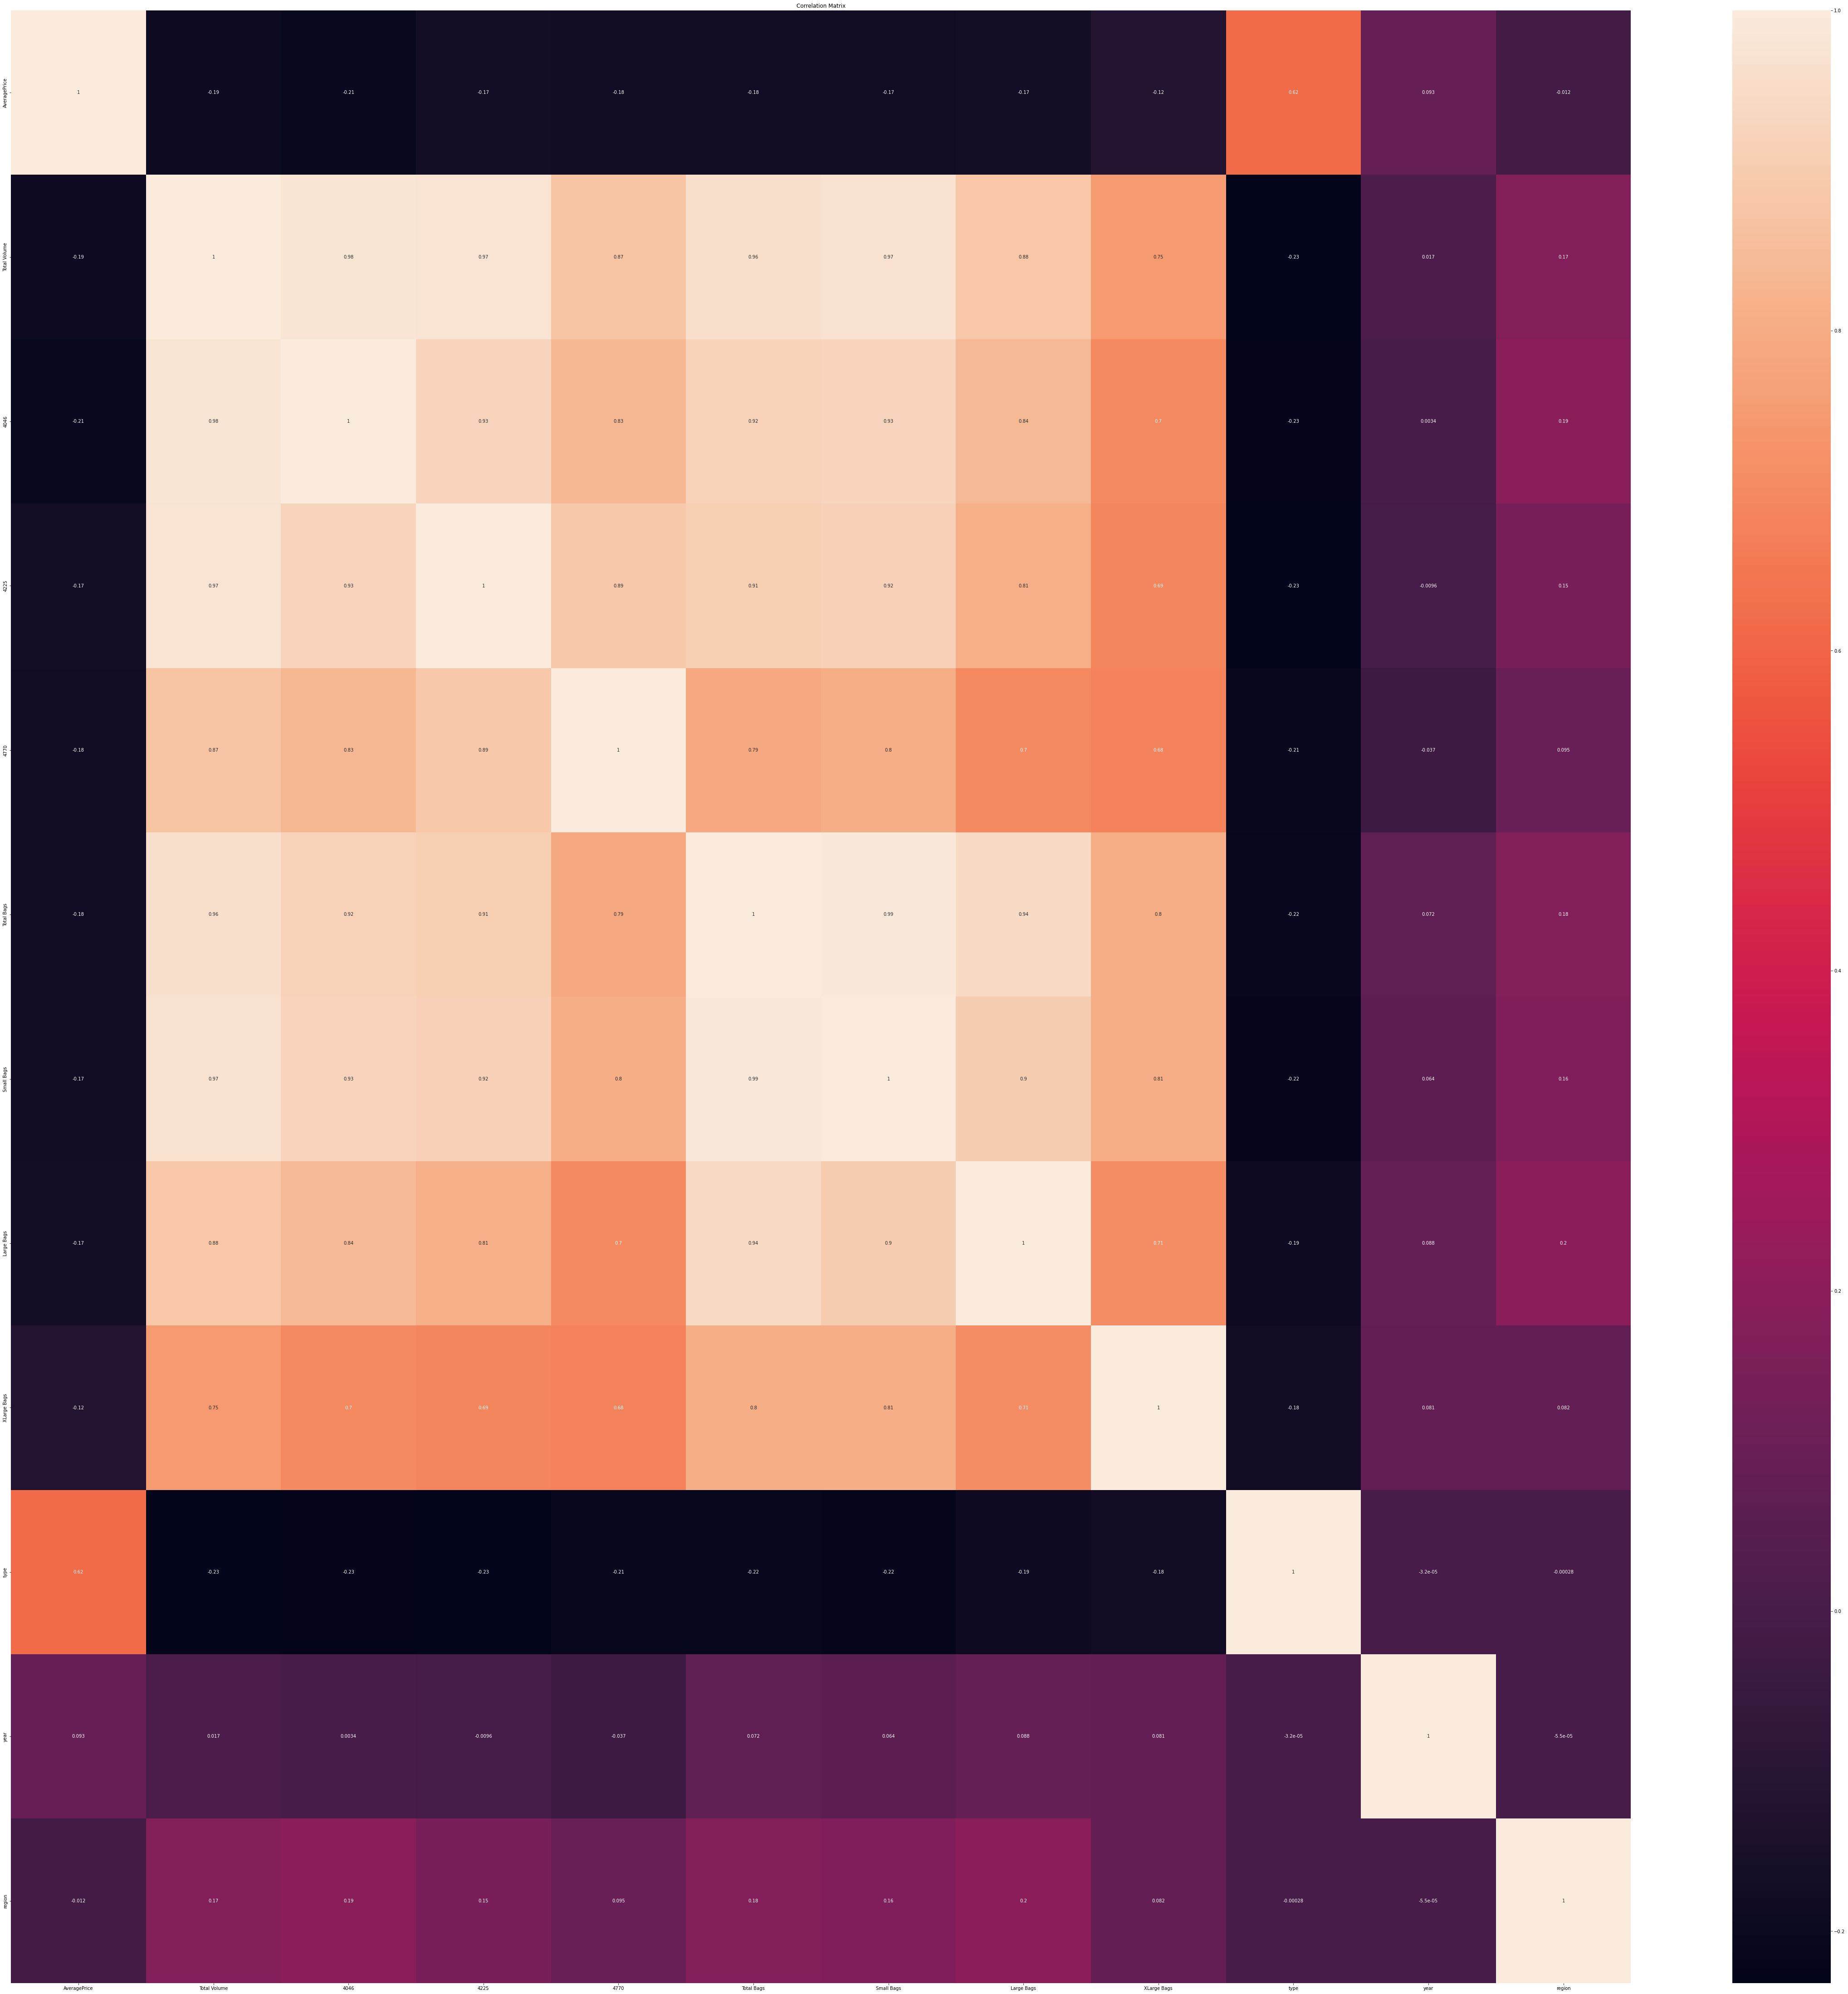

In [243]:
corr_mat=df1.corr()
#Size of the canvas
plt.figure(figsize=[80,80])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Avacado Correlation_matrix.jpg')
plt.show()

We are unable to identify the correlation in above heatmap due to huge number of columns

In [244]:
corr_matrix=df1.corr()
corr_matrix

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


In [245]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [246]:
corr_matrix=df1.corr()
corr_matrix['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

From the correlation values we can clearly see that there is a strong correlation between 'Large bags'
and 'Region' and next strong relation is for 'PLU 4046',the weak positive correlaation is for the
'XLarge bags' and the highest negative correlation is for the 'year'.

Total Volume vs Small, Large, XLarge

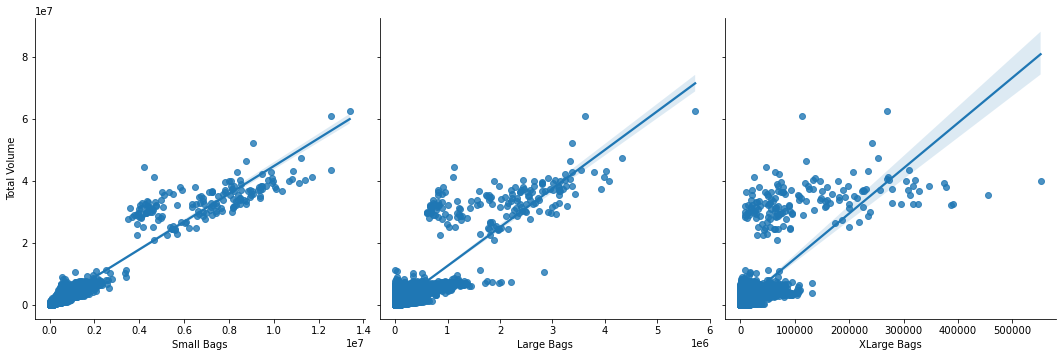

In [247]:
sns.pairplot(df1,x_vars=['Small Bags','Large Bags','XLarge Bags'],y_vars='Total Volume',size=5,aspect=1,
             kind='reg')

Total Bags vs Small, Large, Xlarge bags

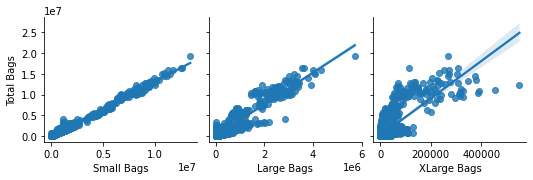

In [248]:
sns.pairplot(df1,x_vars=['Small Bags','Large Bags','XLarge Bags'],y_vars='Total Bags',aspect=1,kind='reg')

There is a strong relation between the small bags and Total Bags also large bags  and total bags
There is a weak correlation between the Total volume and Xlarge bags

# Lets check the data distribution among all the columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:y

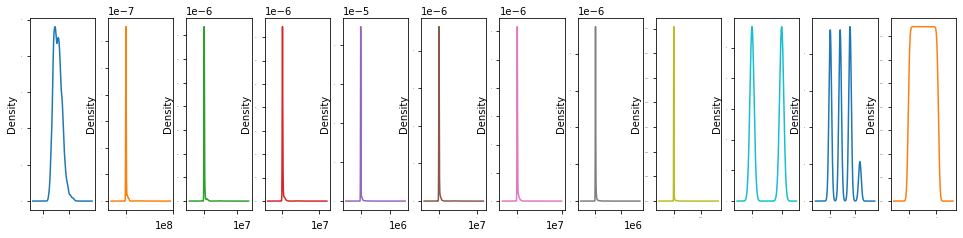

In [249]:
df1.plot(kind='density',subplots=True,layout=(3,13),sharex=False,legend=False,fontsize=1,figsize=(18,12))

From the above plot we can conclude that skewness is present in most of the columns

Spilitting the dependent and independent variables in x and y before removing the skewness

In [250]:
x=df1.drop(['region','Date'],axis=1)
y=df1['region']

In [251]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


In [252]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [253]:
x.shape

(18249, 11)

In [254]:
y.shape

(18249,)

In [255]:
# Checking skewness
x.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
type             0.000329
dtype: float64

# Feature Scaling

In [256]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
x=scaler_x.fit_transform(x)

In [257]:
type(x)

numpy.ndarray

In [258]:
type(y)

pandas.core.series.Series

In [259]:
df2=pd.DataFrame(data=x,columns=['AveragePrice','Total Volume','4046','4225','4770','Total Bags',
                                 'Small Bags','Large Bags','XLarge Bags','type','year'])

In [260]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504


In [261]:
df3=pd.DataFrame(data=y,columns=['region'])

In [262]:
df3

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [263]:
df_new=pd.concat([df2,df3],axis=1)

In [264]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,0
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,0
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,0
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,0
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,53
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,53
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,53
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,53


In [265]:
x=df_new.drop('region',axis=1)
y=df_new['region']

In [266]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504


In [267]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [268]:
type(x)

pandas.core.frame.DataFrame

In [269]:
type(y)

pandas.core.series.Series

Using Power Transform method to remove skewness

In [270]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [271]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

8     1.847417
4     1.461707
2     1.298569
7     1.232329
3     1.095475
6     1.083940
5     1.062207
1     1.056647
10    0.053094
0     0.035847
9     0.000329
dtype: float64

In [272]:
type(x_new)

numpy.ndarray

In [273]:
x.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [274]:
x=pd.DataFrame(x_new,columns=x.columns)

In [275]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.082086,-0.599268,-0.703364,-0.214907,-0.621318,-0.779591,-0.719064,-0.732366,-0.496591,-0.999836,-1.267100
1,-0.028676,-0.637077,-0.708152,-0.314761,-0.619530,-0.767123,-0.702879,-0.732074,-0.496591,-0.999836,-1.267100
2,-1.285004,-0.390132,-0.706561,0.276241,-0.606873,-0.788122,-0.730408,-0.731683,-0.496591,-0.999836,-1.267100
3,-0.806657,-0.540605,-0.702107,-0.045878,-0.617027,-0.824474,-0.778634,-0.729570,-0.496591,-0.999836,-1.267100
4,-0.218810,-0.652714,-0.704622,-0.323072,-0.616465,-0.818641,-0.772295,-0.725162,-0.496591,-0.999836,-1.267100
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.643405,-0.794615,-0.690057,-0.800571,-0.629796,-0.706255,-0.630294,-0.709067,-0.496591,1.000164,1.829325
18245,0.815563,-0.808257,-0.701320,-0.777421,-0.629796,-0.770829,-0.712285,-0.716415,-0.496591,1.000164,1.829325
18246,1.141762,-0.808777,-0.701317,-0.789311,-0.503958,-0.768838,-0.704008,-0.735886,-0.496591,1.000164,1.829325
18247,1.258844,-0.798332,-0.696891,-0.782888,-0.504115,-0.744673,-0.672690,-0.735355,-0.496591,1.000164,1.829325


In [276]:
x.skew().sort_values(ascending=False)

XLarge Bags     1.847417
4770            1.461707
4046            1.298569
Large Bags      1.232329
4225            1.095475
Small Bags      1.083940
Total Bags      1.062207
Total Volume    1.056647
year            0.053094
AveragePrice    0.035847
type            0.000329
dtype: float64

In [277]:
sk=x.skew()

In [278]:
sk

AveragePrice    0.035847
Total Volume    1.056647
4046            1.298569
4225            1.095475
4770            1.461707
Total Bags      1.062207
Small Bags      1.083940
Large Bags      1.232329
XLarge Bags     1.847417
type            0.000329
year            0.053094
dtype: float64

In [279]:
sk[np.abs(sk)>0.5].all()

True

In [280]:
sk[np.abs(sk)>0.5]

Total Volume    1.056647
4046            1.298569
4225            1.095475
4770            1.461707
Total Bags      1.062207
Small Bags      1.083940
Large Bags      1.232329
XLarge Bags     1.847417
dtype: float64

In [281]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Therefore Skewness has been removed, now we can proceed with further steps

# Checking Outliers

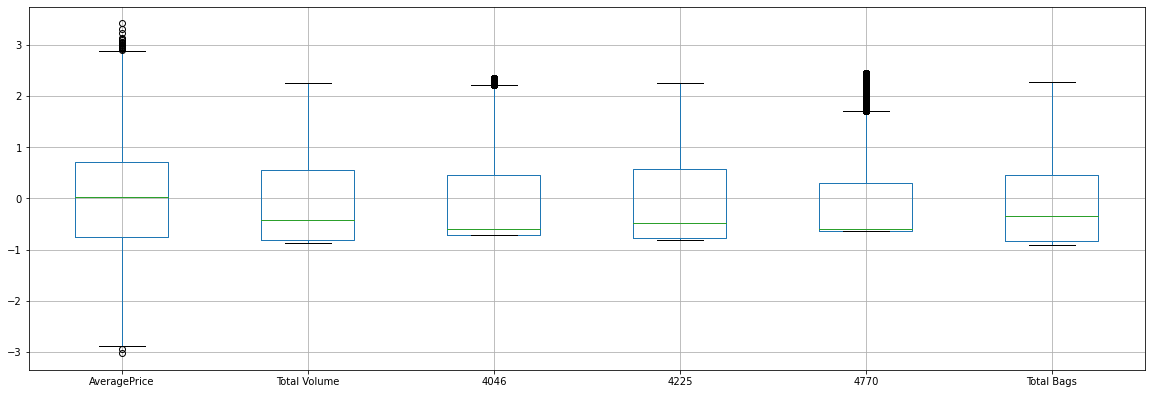

In [282]:
# Plotting boxplots for 1st 6 columns
x.iloc[:,0:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

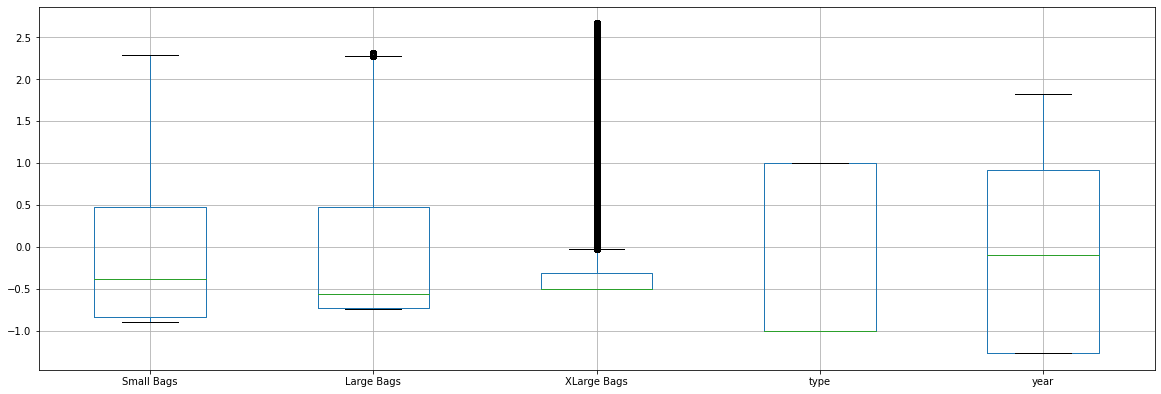

In [283]:
# Plotting outliers for rest of all columns
x.iloc[:,6:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Let's Quantify

In [284]:
from scipy.stats import zscore
(np.abs(zscore(x)<3).all())

AveragePrice    False
Total Volume     True
4046             True
4225             True
4770             True
Total Bags       True
Small Bags       True
Large Bags       True
XLarge Bags      True
type             True
year             True
dtype: bool

So outliers are present in my data.Therefore we shall remove outliers from the datas

# Removing Outliers

1.Finding the Boundary values

In [285]:
print('Highest allowed',df_new['AveragePrice'].mean()+3*df_new['AveragePrice'].std())
print('Lowest allowed',df_new['AveragePrice'].mean()-3*df_new['AveragePrice'].std())

Highest allowed 3.000082199662965
Lowest allowed -3.000082199662974


2. Finding the outliers

In [286]:
df_new[(df_new['AveragePrice']>3) | (df_new['AveragePrice']<-3)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11320,3.437149,-0.242656,-0.230875,-0.235426,-0.212540,-0.242989,-0.244177,-0.222734,-0.17558,1.000164,-1.221282,42
11321,3.114301,-0.242254,-0.230808,-0.234343,-0.212540,-0.242989,-0.244177,-0.222734,-0.17558,1.000164,-1.221282,42
11323,3.312977,-0.242901,-0.230671,-0.236387,-0.212540,-0.242934,-0.244104,-0.222734,-0.17558,1.000164,-1.221282,42
11324,3.437149,-0.241916,-0.230679,-0.233524,-0.212540,-0.242973,-0.244156,-0.222734,-0.17558,1.000164,-1.221282,42
11325,3.288142,-0.242031,-0.230525,-0.234002,-0.212540,-0.242985,-0.244173,-0.222734,-0.17558,1.000164,-1.221282,42
...,...,...,...,...,...,...,...,...,...,...,...,...
17302,3.486818,-0.245127,-0.231618,-0.243137,-0.212355,-0.241292,-0.244082,-0.216169,-0.17558,1.000164,0.906575,48
17303,3.561322,-0.245277,-0.231601,-0.242719,-0.212439,-0.242344,-0.243922,-0.220906,-0.17558,1.000164,0.906575,48
17304,3.064632,-0.244952,-0.231517,-0.242731,-0.212372,-0.241304,-0.243243,-0.218781,-0.17558,1.000164,0.906575,48
17402,3.213639,-0.245365,-0.231536,-0.244579,-0.212540,-0.240450,-0.241850,-0.219591,-0.17558,1.000164,0.906575,50


3. Trimming of Outliers

In [287]:
new_df=df_new[(df_new['AveragePrice']<3)&(df_new['AveragePrice']>-3)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,0
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,0
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,0
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,0
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,53
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,53
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,53
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,53


4. Capping of Outliers

In [288]:
upper_limit=df_new['AveragePrice'].mean()+3*df_new['AveragePrice'].std()
lower_limit=df_new['AveragePrice'].mean()-3*df_new['AveragePrice'].std()

5. Capping on outliers

In [289]:
df_new['AveragePrice']=np.where(
    df['AveragePrice']>upper_limit,
    upper_limit,
    np.where(
        df['AveragePrice']<lower_limit,
        lower_limit,
        df['AveragePrice']
    )
)

6. Now see the statistics using describe function

In [290]:
df_new['AveragePrice'].describe()

count    18249.000000
mean         1.405942
std          0.402526
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.000082
Name: AveragePrice, dtype: float64

1. Finding the Boundary values

In [291]:
print('Highest allowed',df_new['4046'].mean()+3*df_new['4046'].std())
print('Lowest allowed',df_new['4046'].mean()-3*df_new['4046'].std())

Highest allowed 3.000082199663029
Lowest allowed -3.00008219966303


2. Finding the outliers

In [292]:
df_new[(df_new['4046']>3) | (df_new['4046']<-3)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
346,0.88,2.234545,3.199411,2.581200,1.578563,0.397641,0.572525,-0.141836,-0.024443,-0.999836,-1.221282,6
359,0.85,2.369090,3.558337,2.629036,1.435922,0.365549,0.501248,-0.053840,-0.020663,-0.999836,-1.221282,6
2368,0.69,1.862242,3.459379,1.133601,0.511862,0.644125,0.716400,0.425325,-0.173176,-0.999836,-1.221282,45
2370,0.74,1.592411,3.038396,1.001711,0.104537,0.444631,0.466972,0.381807,-0.173995,-0.999836,-1.221282,45
2652,0.95,7.658236,7.378837,8.224266,10.808563,6.133765,6.256328,4.911837,10.327345,-0.999836,-1.221282,51
...,...,...,...,...,...,...,...,...,...,...,...,...
9097,0.87,17.853158,16.860032,16.734953,9.715053,19.400930,17.693827,23.220099,15.054169,-0.999836,1.970504,51
9098,1.09,11.386002,11.272178,9.820491,5.147303,12.861636,12.821971,12.242975,7.366885,-0.999836,1.970504,51
9099,1.08,12.187571,11.008962,11.323553,8.430727,13.813231,12.978515,15.311509,11.497183,-0.999836,1.970504,51
9100,1.20,10.554458,9.729924,9.609803,5.862294,12.107276,10.649281,15.835560,7.410098,-0.999836,1.970504,51


3. Trimming the outliers

In [293]:
new_df=df_new[(df_new['4046']<3)&(df_new['4046']>-3)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,0
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,0
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,0
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,0
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,53
18245,1.71,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,53
18246,1.87,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,53
18247,1.93,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,53


4. Capping on outliers

In [294]:
upper_limit=df_new['4046'].mean()+3*df_new['4046'].std()
lower_limit=df_new['4046'].mean()-3*df_new['4046'].std()

5. Now apply the capping

In [295]:
df_new['4046']=np.where(
    df['4046']>upper_limit,
    upper_limit,
    np.where(
        df['4046']<lower_limit,
        lower_limit,
        df['4046']
    )
)

In [296]:
df_new['4046'].describe()

count    18249.000000
mean         2.952403
std          0.359627
min          0.000000
25%          3.000082
50%          3.000082
75%          3.000082
max          3.000082
Name: 4046, dtype: float64

In [297]:
print('Highest allowed',df_new['4770'].mean()+3*df_new['4770'].std())
print('Lowest allowed',df_new['4770'].mean()-3*df_new['4770'].std())

Highest allowed 3.000082199663718
Lowest allowed -3.000082199663735


In [298]:
df_new[(df_new['4770']>3) | (df_new['4770']<-3)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
783,1.00,0.616978,3.000082,1.150612,3.494109,0.264770,0.192527,0.286803,2.684548,-0.999836,-1.221282,15
787,0.98,0.675933,3.000082,1.245382,3.744638,0.319707,0.244998,0.343595,2.750882,-0.999836,-1.221282,15
788,1.00,0.688726,3.000082,1.270969,3.404611,0.343663,0.291454,0.322733,2.414674,-0.999836,-1.221282,15
790,1.03,0.617037,3.000082,1.163277,3.079274,0.299769,0.318115,0.156958,1.129356,-0.999836,-1.221282,15
791,1.02,0.623576,3.000082,1.127069,4.038033,0.304162,0.271495,0.158543,3.318580,-0.999836,-1.221282,15
...,...,...,...,...,...,...,...,...,...,...,...,...
9097,0.87,17.853158,3.000082,16.734953,9.715053,19.400930,17.693827,23.220099,15.054169,-0.999836,1.970504,51
9098,1.09,11.386002,3.000082,9.820491,5.147303,12.861636,12.821971,12.242975,7.366885,-0.999836,1.970504,51
9099,1.08,12.187571,3.000082,11.323553,8.430727,13.813231,12.978515,15.311509,11.497183,-0.999836,1.970504,51
9100,1.20,10.554458,3.000082,9.609803,5.862294,12.107276,10.649281,15.835560,7.410098,-0.999836,1.970504,51


In [299]:
new_df=df_new[(df_new['4770']<3)&(df_new['4770']>-3)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,-0.227716,3.000082,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,0
1,1.35,-0.230427,3.000082,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,0
2,0.93,-0.212085,3.000082,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,0
3,1.08,-0.223444,3.000082,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,0
4,1.28,-0.231538,3.000082,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,3.000082,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,53
18245,1.71,-0.242296,3.000082,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,53
18246,1.87,-0.242331,3.000082,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,53
18247,1.93,-0.241625,3.000082,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,53


In [300]:
upper_limit=df_new['4770'].mean()+3*df_new['4770'].std()
lower_limit=df_new['4770'].mean()-3*df_new['4770'].std()

In [301]:
df_new['4770']=np.where(
    df['4770']>upper_limit,
    upper_limit,
    np.where(
        df['4770']<lower_limit,
        lower_limit,
        df['4770']
    )
)

In [302]:
new_df['4770'].describe()

count    17990.000000
mean        -0.098292
std          0.342923
min         -0.212540
25%         -0.212540
50%         -0.210961
75%         -0.160502
max          2.993164
Name: 4770, dtype: float64

In [303]:
print('Highest allowed',df_new['Large Bags'].mean()+3*df_new['Large Bags'].std())
print('Lowest allowed',df_new['Large Bags'].mean()-3*df_new['Large Bags'].std())

Highest allowed 3.0000821996630584
Lowest allowed -3.0000821996630647


In [304]:
df_new[(df_new['Large Bags']>3) | (df_new['Large Bags']<-3)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,0.95,7.658236,3.000082,8.224266,3.000082,6.133765,6.256328,4.911837,10.327345,-0.999836,-1.221282,51
2653,0.98,7.017040,3.000082,7.503365,3.000082,5.681421,5.945382,3.978986,11.089427,-0.999836,-1.221282,51
2654,0.93,7.873485,3.000082,8.729171,3.000082,6.210246,6.409188,5.398861,1.428342,-0.999836,-1.221282,51
2655,0.89,8.093283,3.000082,9.854504,3.000082,6.147363,6.463621,4.835307,3.398235,-0.999836,-1.221282,51
2656,0.99,6.303074,3.000082,7.232053,3.000082,4.612958,4.985215,3.288345,1.548076,-0.999836,-1.221282,51
...,...,...,...,...,...,...,...,...,...,...,...,...
9109,0.83,2.812958,3.000082,2.490834,3.000082,3.819912,1.298927,11.411336,0.799756,-0.999836,1.970504,52
9110,1.01,1.782745,3.000082,1.137659,3.000082,2.323097,1.437108,4.942265,0.737769,-0.999836,1.970504,52
9111,1.04,1.796225,3.000082,1.259622,3.000082,2.715395,1.359991,6.776974,0.559035,-0.999836,1.970504,52
9112,1.05,1.947852,3.000082,1.439817,3.000082,2.987509,1.300290,8.046487,0.739895,-0.999836,1.970504,52


In [305]:
new_df=df_new[(df_new['Large Bags']<3)&(df_new['Large Bags']>-3)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,-0.227716,3.000082,-0.199902,3.000082,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,0
1,1.35,-0.230427,3.000082,-0.208054,3.000082,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,0
2,0.93,-0.212085,3.000082,-0.154478,3.000082,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,0
3,1.08,-0.223444,3.000082,-0.185350,3.000082,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,0
4,1.28,-0.231538,3.000082,-0.208719,3.000082,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,3.000082,-0.243857,0.000000,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,53
18245,1.71,-0.242296,3.000082,-0.242277,0.000000,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,53
18246,1.87,-0.242331,3.000082,-0.243090,3.000082,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,53
18247,1.93,-0.241625,3.000082,-0.242651,3.000082,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,53


In [306]:
upper_limit=df_new['Large Bags'].mean()+3*df_new['Large Bags'].std()
lower_limit=df_new['Large Bags'].mean()-3*df_new['Large Bags'].std()

In [307]:
df_new['Large Bags']=np.where(
    df['Large Bags']>upper_limit,
    upper_limit,
    np.where(
        df['Large Bags']<lower_limit,
        lower_limit,
        df['Large Bags']
    )
)

In [308]:
df_new['Large Bags'].describe()

count    18249.000000
mean         2.608090
std          1.008904
min          0.000000
25%          3.000082
50%          3.000082
75%          3.000082
max          3.000082
Name: Large Bags, dtype: float64

In [309]:
print('Highest allowed',df_new['XLarge Bags'].mean()+3*df_new['XLarge Bags'].std())
print('Lowest allowed',df_new['XLarge Bags'].mean()-3*df_new['XLarge Bags'].std())

Highest allowed 3.0000821996642375
Lowest allowed -3.0000821996642677


In [310]:
df_new[(df_new['XLarge Bags']>3) | (df_new['XLarge Bags']<-3)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
780,1.01,0.500936,3.000082,0.927386,3.000082,0.342574,0.291907,3.000082,4.294451,-0.999836,-1.221282,15
781,1.01,0.478971,3.000082,0.865593,3.000082,0.306647,0.235907,3.000082,3.263235,-0.999836,-1.221282,15
791,1.02,0.623576,3.000082,1.127069,3.000082,0.304162,0.271495,3.000082,3.318580,-0.999836,-1.221282,15
799,1.03,0.811574,3.000082,1.488260,3.000082,0.442548,0.407441,3.000082,3.226598,-0.999836,-1.221282,15
2340,0.81,1.152766,3.000082,0.826927,3.000082,0.621585,0.644790,3.000082,4.573834,-0.999836,-1.221282,45
...,...,...,...,...,...,...,...,...,...,...,...,...
9097,0.87,17.853158,3.000082,16.734953,3.000082,19.400930,17.693827,3.000082,15.054169,-0.999836,1.970504,51
9098,1.09,11.386002,3.000082,9.820491,3.000082,12.861636,12.821971,3.000082,7.366885,-0.999836,1.970504,51
9099,1.08,12.187571,3.000082,11.323553,3.000082,13.813231,12.978515,3.000082,11.497183,-0.999836,1.970504,51
9100,1.20,10.554458,3.000082,9.609803,3.000082,12.107276,10.649281,3.000082,7.410098,-0.999836,1.970504,51


In [311]:
new_df=df_new[(df_new['XLarge Bags']<3)&(df_new['XLarge Bags']>-3)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,-0.227716,3.000082,-0.199902,3.000082,-0.234170,-0.232647,3.000082,-0.17558,-0.999836,-1.221282,0
1,1.35,-0.230427,3.000082,-0.208054,3.000082,-0.233350,-0.231568,3.000082,-0.17558,-0.999836,-1.221282,0
2,0.93,-0.212085,3.000082,-0.154478,3.000082,-0.234730,-0.233399,3.000082,-0.17558,-0.999836,-1.221282,0
3,1.08,-0.223444,3.000082,-0.185350,3.000082,-0.237096,-0.236568,3.000082,-0.17558,-0.999836,-1.221282,0
4,1.28,-0.231538,3.000082,-0.208719,3.000082,-0.236718,-0.236154,3.000082,-0.17558,-0.999836,-1.221282,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,3.000082,-0.243857,0.000000,-0.229301,-0.226665,3.000082,-0.17558,1.000164,1.970504,53
18245,1.71,-0.242296,3.000082,-0.242277,0.000000,-0.233594,-0.232196,3.000082,-0.17558,1.000164,1.970504,53
18246,1.87,-0.242331,3.000082,-0.243090,3.000082,-0.233463,-0.231644,3.000082,-0.17558,1.000164,1.970504,53
18247,1.93,-0.241625,3.000082,-0.242651,3.000082,-0.231866,-0.229543,3.000082,-0.17558,1.000164,1.970504,53


In [312]:
upper_limit=df_new['XLarge Bags'].mean()+3*df_new['XLarge Bags'].std()
lower_limit=df_new['XLarge Bags'].mean()-3*df_new['XLarge Bags'].std()

In [313]:
df_new['XLarge Bags']=np.where(
    df['XLarge Bags']>upper_limit,
    upper_limit,
    np.where(
        df['XLarge Bags']<lower_limit,
        lower_limit,
        df['XLarge Bags']
    )
)

In [314]:
df_new['XLarge Bags'].describe()

count    18249.000000
mean         1.013129
std          1.415181
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000082
max          3.000082
Name: XLarge Bags, dtype: float64

# Training Process Began

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [316]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.082086,-0.599268,-0.703364,-0.214907,-0.621318,-0.779591,-0.719064,-0.732366,-0.496591,-0.999836,-1.267100
1,-0.028676,-0.637077,-0.708152,-0.314761,-0.619530,-0.767123,-0.702879,-0.732074,-0.496591,-0.999836,-1.267100
2,-1.285004,-0.390132,-0.706561,0.276241,-0.606873,-0.788122,-0.730408,-0.731683,-0.496591,-0.999836,-1.267100
3,-0.806657,-0.540605,-0.702107,-0.045878,-0.617027,-0.824474,-0.778634,-0.729570,-0.496591,-0.999836,-1.267100
4,-0.218810,-0.652714,-0.704622,-0.323072,-0.616465,-0.818641,-0.772295,-0.725162,-0.496591,-0.999836,-1.267100
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.643405,-0.794615,-0.690057,-0.800571,-0.629796,-0.706255,-0.630294,-0.709067,-0.496591,1.000164,1.829325
18245,0.815563,-0.808257,-0.701320,-0.777421,-0.629796,-0.770829,-0.712285,-0.716415,-0.496591,1.000164,1.829325
18246,1.141762,-0.808777,-0.701317,-0.789311,-0.503958,-0.768838,-0.704008,-0.735886,-0.496591,1.000164,1.829325
18247,1.258844,-0.798332,-0.696891,-0.782888,-0.504115,-0.744673,-0.672690,-0.735355,-0.496591,1.000164,1.829325


In [317]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

Finding the best random state

In [318]:
maxacc=0 # max accuracy
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',i)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        print('accuracy',maxacc,'random_state',i)

accuracy 0.45972602739726026 random_state 1
accuracy 0.45972602739726026 random_state 1
accuracy 0.4558904109589041 random_state 2


KeyboardInterrupt: 

In [ ]:
print('Best accuracy is ',maxacc,'on Random state',maxrs)

# Creating train test split

In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=148)

In [320]:
x_train

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
2255,-0.593950,0.713072,0.917698,0.895795,0.922454,0.458848,0.780518,-0.738609,-0.489334,-0.999836,-1.267100
17346,0.050003,-0.845176,-0.716063,-0.818831,-0.629796,-0.833829,-0.791730,-0.726840,-0.496591,1.000164,0.920483
11164,0.532122,-0.845739,-0.716269,-0.775644,-0.629796,-0.891715,-0.879542,-0.689345,-0.496591,1.000164,-1.267100
16691,-0.475661,-0.720913,-0.668903,-0.774586,-0.628930,-0.506080,-0.893921,0.673549,-0.496591,1.000164,0.920483
5715,-1.756604,1.041125,1.693440,0.002683,-0.572917,1.301291,1.316134,1.480268,0.201425,-0.999836,0.920483
...,...,...,...,...,...,...,...,...,...,...,...
7074,-0.163585,0.191358,0.890201,-0.585375,-0.611349,0.401735,0.607645,-0.224718,1.349537,-0.999836,0.920483
5582,-1.317918,1.256300,1.951971,0.095691,0.930167,1.252521,1.076000,1.808678,-0.496591,-0.999836,-0.093135
4019,-0.417446,-0.497248,-0.672854,-0.242211,-0.519796,-0.406506,-0.619487,0.416461,-0.489290,-0.999836,-0.093135
3934,-1.551686,0.387472,0.554481,0.328564,0.559712,0.518014,0.239969,1.369955,-0.205556,-0.999836,-0.093135


In [321]:
x_test

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
11387,1.354514,-0.740164,-0.601954,-0.573459,-0.580728,-0.916738,-0.897377,-0.738813,-0.496591,1.000164,-1.267100
17777,-0.274728,-0.832523,-0.716472,-0.810258,-0.629796,-0.798617,-0.742036,-0.738813,-0.496591,1.000164,1.829325
2336,-0.868708,0.244402,1.007432,-0.290929,0.955752,-0.027643,-0.052954,0.314694,-0.496591,-0.999836,-1.267100
12565,1.021976,-0.766296,-0.444320,-0.793035,-0.627144,-0.915343,-0.897377,-0.732821,-0.496591,1.000164,-0.093135
15118,1.632316,-0.833963,-0.716984,-0.772304,-0.606718,-0.854123,-0.817383,-0.730255,-0.496591,1.000164,0.920483
...,...,...,...,...,...,...,...,...,...,...,...
10730,1.042139,-0.841107,-0.716987,-0.808586,-0.629796,-0.831118,-0.784600,-0.738813,-0.496591,1.000164,-1.267100
14681,0.023972,-0.227341,-0.437471,-0.253120,-0.619100,0.262053,-0.059505,1.229608,-0.496591,1.000164,-0.093135
17188,1.082223,-0.488747,-0.699885,-0.635666,-0.612842,0.102405,0.142672,0.244073,-0.496591,1.000164,0.920483
8558,-0.564150,2.250635,2.356816,2.237417,2.441053,2.260362,2.279858,0.576477,2.665886,-0.999836,1.829325


In [322]:
y_train

2255     43
17346    49
11164    39
16691    36
5715      1
         ..
7074     27
5582     53
4019     23
3934     21
16499    33
Name: region, Length: 14599, dtype: int32

In [323]:
y_test

11387    43
17777    14
2336     44
12565    12
15118     7
         ..
10730    30
14681    52
17188    46
8558      6
5247     46
Name: region, Length: 3650, dtype: int32

In [324]:
x_train.shape

(14599, 11)

In [325]:
y_train.shape

(14599,)

In [326]:
x_test.shape

(3650, 11)

In [327]:
y_test.shape

(3650,)

# Model Evaluation

1. Logistic Regression model

In [328]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 48.43835616438356
[[40  0  0 ...  0  0  0]
 [ 2 10  0 ...  0  0  1]
 [ 0  0 27 ...  0  0  4]
 ...
 [ 0  0  0 ... 75  3  0]
 [ 0  0  0 ...  4 64  0]
 [ 0  6  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.37      0.56      0.44        72
           1       0.20      0.22      0.21        45
           2       0.64      0.45      0.53        60
           3       0.17      0.44      0.25        57
           4       0.55      0.52      0.54        81
           5       0.41      0.36      0.38        72
           6       0.83      0.70      0.76        83
           7       0.41      0.66      0.50        64
           8       0.65      0.87      0.74        61
           9       0.52      0.60      0.56        70
          10       0.48      0.27      0.35        73
          11       0.38      0.49      0.43        57
          12       0.47      0.55      0.50        55
          13       0.53      0.33      0.41        57
      

Decision Tree Classifier

In [329]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.35616438356165
[[60  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  1]
 [ 0  0 52 ...  0  0  1]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  1 ...  0  0 36]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        72
           1       0.51      0.62      0.56        45
           2       0.87      0.87      0.87        60
           3       0.84      0.81      0.82        57
           4       0.82      0.83      0.82        81
           5       0.77      0.82      0.79        72
           6       0.96      0.96      0.96        83
           7       0.79      0.89      0.84        64
           8       0.90      0.92      0.91        61
           9       0.81      0.79      0.80        70
          10       0.68      0.66      0.67        73
          11       0.78      0.79      0.78        57
          12       0.85      0.85      0.85        55
          13       0.62      0.70      0.66        57
      

Random Forest Classifier

In [330]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 91.17808219178082
[[68  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  1]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  1 ...  0  0 43]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        72
           1       0.71      0.80      0.75        45
           2       0.97      0.95      0.96        60
           3       0.89      0.82      0.85        57
           4       0.99      0.95      0.97        81
           5       0.91      0.88      0.89        72
           6       0.99      1.00      0.99        83
           7       0.89      0.97      0.93        64
           8       0.98      1.00      0.99        61
           9       0.93      0.91      0.92        70
          10       0.89      0.86      0.88        73
          11       0.88      0.98      0.93        57
          12       0.93      0.96      0.95        55
          13       0.82      0.89      0.86        57
      

In [331]:
rf

RandomForestClassifier()

Support Vector Classifier

In [332]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


Accuracy 58.082191780821915
[[56  0  0 ...  0  0  0]
 [ 5 16  0 ...  0  0  1]
 [ 1  0 26 ...  0  0  1]
 ...
 [ 0  0  0 ... 76  1  0]
 [ 0  0  0 ... 10 63  0]
 [ 5  1  0 ...  0  0 25]]
              precision    recall  f1-score   support

           0       0.18      0.78      0.29        72
           1       0.57      0.36      0.44        45
           2       0.90      0.43      0.58        60
           3       0.92      0.39      0.54        57
           4       0.90      0.58      0.71        81
           5       0.69      0.38      0.49        72
           6       0.89      0.81      0.85        83
           7       0.62      0.55      0.58        64
           8       0.86      0.90      0.88        61
           9       0.56      0.60      0.58        70
          10       0.85      0.45      0.59        73
          11       0.30      0.77      0.43        57
          12       0.84      0.69      0.76        55
          13       0.84      0.37      0.51        57
     

AdaBoost Classifier

In [333]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)
print(accuracy_score(y_test,adb_pred))
print(confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

0.09041095890410959
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        57
           4       0.11      0.21      0.15        81
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        70
          10       0.00      0.00      0.00        73
          11       0.10      0.33      0.16        57
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        57
          14 

Observations :
        
           From the above models Random forest performs well with the accuracy of 90%. Therfore let's 
see the cross validation score.

Cross Validation

In [334]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of Logistic regression model:',scr.mean())

Cross validation score of Logistic regression model: 0.36565165911471337


In [335]:
scr2=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score of Random forest model :',scr2.mean())

Cross Validation score of Random forest model : 0.6823284592889025


In [336]:
scr3=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score of Support vector model :',scr3.mean())

Cross Validation score of Support vector model : 0.44275034255960544


In [337]:
scr4=cross_val_score(adb,x,y,cv=5)
print('Cross Validation Score of AdaBoostClassifier model :',scr4.mean())

Cross Validation Score of AdaBoostClassifier model : 0.05983913025523975


In [338]:
scr5=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision Tree Classifier model :',scr5.mean())

Cross validation score of Decision Tree Classifier model : 0.5603513967046705


Therefore from the obsevations cross validation score of RandomForestClassifier has produced the best
value among the all other models. So lets go with RandomForestclassifier

# LINEAR REGRESSION 

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [340]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [341]:
x=df1.drop(['AveragePrice','Date'],axis=1)
y=df['AveragePrice']

In [342]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [343]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [344]:
# Checking Skewness
x.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
year             0.215339
type             0.000329
region           0.000030
dtype: float64

We can see skewness in most of our columns so we can remove skewness in using Power_transform method

In [345]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [346]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

7     0.793520
9     0.213156
3     0.032184
0     0.011171
5     0.007058
8     0.000329
4    -0.001626
2    -0.017740
1    -0.022679
6    -0.073809
10   -0.261443
dtype: float64

In [347]:
type(x_new)

numpy.ndarray

In [348]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [349]:
x=pd.DataFrame(x_new,columns=x.columns)

In [350]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [351]:
x.skew().sort_values(ascending=False)


XLarge Bags     0.793520
year            0.213156
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
type            0.000329
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
region         -0.261443
dtype: float64

In [352]:
sk=x.skew()

In [353]:
sk

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
dtype: float64

In [354]:
sk[np.abs(sk)>0.5].all()

True

In [355]:
sk[np.abs(sk)>0.5]

XLarge Bags    0.79352
dtype: float64

In [356]:
sk[np.abs(sk)>0.5].all()

True

In [357]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed now we can proceed with further steps

Checking Outliers

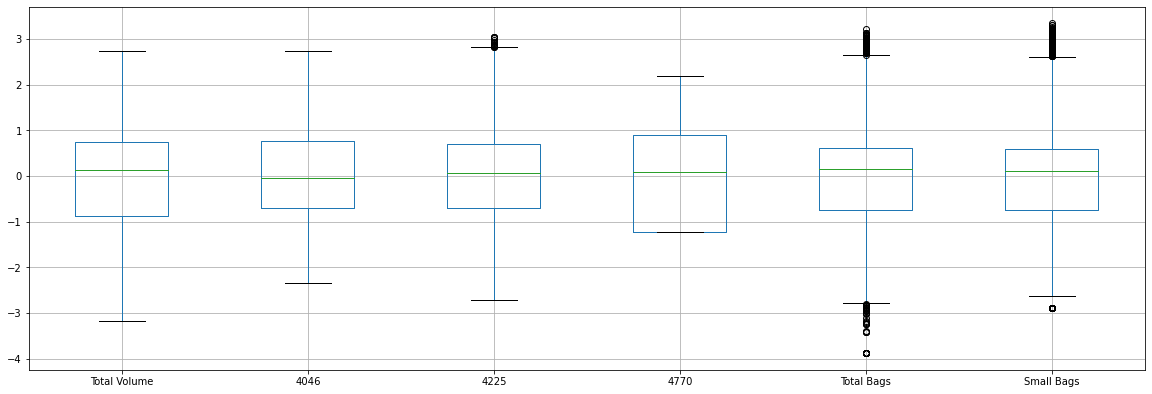

In [358]:
# Plotting Boxplot for 1st 6 columns
x.iloc[:,0:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

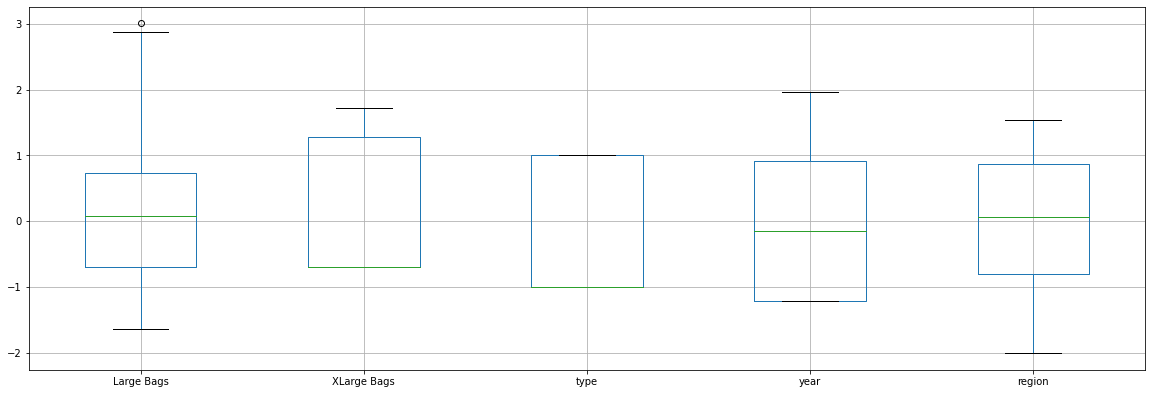

In [359]:
# Plotting for rest of the columns
x.iloc[:,6:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Creating train_test_split

In [360]:
from  sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [361]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [362]:
x_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8051,1.890024,2.084043,1.637827,1.147043,1.871626,1.984368,1.297432,1.653003,-0.999836,0.906851,1.132725
17367,-1.459553,-2.343573,-1.556546,-1.238310,-0.986885,-1.072343,-0.034082,-0.699849,1.000164,0.906851,1.340582
12549,-0.670461,-0.095376,-1.190970,-1.238310,-0.494707,-0.457481,0.110824,-0.699849,1.000164,-0.156623,-0.949370
17045,-0.294534,-0.572569,-0.131556,-0.407484,-0.119962,-1.497610,0.725216,-0.699849,1.000164,0.906851,1.026912
6631,0.393320,-0.047163,0.487758,0.409471,0.555493,0.227939,1.090680,1.157185,-0.999836,0.906851,-0.382128
...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.412237,-0.305011,-0.211920,0.200930,-0.331266,-0.397517,0.325458,-0.699849,1.000164,-1.221895,0.589246
17289,-1.141105,-0.728652,-0.999318,-1.238310,-0.839686,-0.968762,0.072992,-0.699849,1.000164,0.906851,1.289068
5192,1.757007,1.926251,1.538926,1.820623,1.556281,1.598157,1.342466,1.631940,-0.999836,-0.156623,1.132725
12172,-0.650130,-1.853945,-1.201226,-1.238310,-0.223022,-0.112083,-0.010320,-0.699849,1.000164,-0.156623,-1.545823


In [363]:
x_test

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14192,-0.415677,-0.484965,0.024338,-0.323249,-0.977272,-1.420765,0.069352,-0.699849,1.000164,-0.156623,1.026912
1873,0.718844,0.667339,0.664956,1.067516,0.853912,0.968507,-1.015323,1.282375,-0.999836,-1.221895,0.645340
7293,0.820233,1.149051,0.387017,-0.074612,0.655288,0.505965,1.038490,-0.699849,-0.999836,0.906851,0.360332
15087,0.364995,0.364923,0.348507,-1.238310,0.508671,0.592802,0.343685,-0.699849,1.000164,0.906851,-1.359681
9888,-1.831631,-1.884775,-1.032343,-1.238310,-1.867121,-1.462309,-1.645675,-0.699849,1.000164,-1.221895,-0.726992
...,...,...,...,...,...,...,...,...,...,...,...
4471,0.591826,0.968491,0.103868,0.133067,0.430406,0.339374,0.818840,-0.699849,-0.999836,-0.156623,0.360332
12556,-0.882150,-0.220122,-1.315452,-1.238310,-0.712774,-0.516406,-0.607081,-0.699849,1.000164,-0.156623,-0.949370
9063,0.514014,0.726306,-0.410316,0.349216,0.755802,0.779932,0.795396,-0.699849,-0.999836,1.968548,1.289068
7497,1.417825,1.453103,1.344463,1.234565,1.515584,1.635279,0.354343,1.651896,-0.999836,0.906851,0.589246


In [364]:
y_train

8051     0.68
17367    2.37
12549    1.18
17045    2.12
6631     1.26
         ... 
10955    1.64
17289    1.81
5192     0.82
12172    1.57
235      1.24
Name: AveragePrice, Length: 14599, dtype: float64

In [365]:
y_test

14192    2.11
1873     0.98
7293     1.17
15087    1.78
9888     1.61
         ... 
4471     1.11
12556    1.26
9063     1.05
7497     1.31
9151     2.04
Name: AveragePrice, Length: 3650, dtype: float64

In [366]:
x_train.shape

(14599, 11)

In [367]:
x_test.shape

(3650, 11)

In [368]:
y_train.shape

(14599,)

In [369]:
y_test.shape

(3650,)

In [370]:
lr=LinearRegression()

In [371]:
lr.fit(x_train,y_train)

LinearRegression()

In [372]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Volume,-0.285951
4046,0.004125
4225,0.265260
4770,0.025798
Total Bags,-0.253222
Small Bags,0.196786
Large Bags,-0.042085
XLarge Bags,0.011063
type,0.184493
year,0.083519


In [373]:
lr.intercept_

1.4053950977241403

To Make Predictions on Test Data

In [374]:
y_pred=lr.predict(x_test)

In [377]:
com_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
com_df

,Actual Price,Predicted Price
14192,2.11,1.666230
1873,0.98,1.162086
7293,1.17,1.055819
15087,1.78,1.566169
9888,1.61,1.932443
...,...,...
4471,1.11,0.995223
12556,1.26,1.528079
9063,1.05,1.083985
7497,1.31,1.236967


In [379]:
pd.set_option('display.max_rows',None)

In [380]:
com_df

,Actual Price,Predicted Price
14192,2.11,1.666230
1873,0.98,1.162086
7293,1.17,1.055819
15087,1.78,1.566169
9888,1.61,1.932443
420,1.11,1.209441
10808,1.99,1.774267
3032,1.41,1.276048
5156,1.19,1.030569
15724,1.02,1.193656


In [381]:
com_df.shape

(3650, 2)

In [382]:
print('Error : ')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred)))

Error : 
Mean Squared Error : 0.07522983812779976
Mean Absolute Error : 0.21234453338468495
Root Mean Squared Error : 0.2742805828486584


In [383]:
df1.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000


So if we compare mean of price with RMSE then we can conclude that our model is slightly greater than
than the mean therefore lower the rmse higher the performance